In [44]:
from docx import Document
import pandas as pd
from datetime import datetime, timedelta
from pymeteosource.api import Meteosource
from pymeteosource.types import tiers, sections, langs, units
from pymeteosource.data import Forecast
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Change this to your actual API key
YOUR_API_KEY = 'sxz7rlz4v623scbzl0y0btyv00kllqiw59lmplda'
# Change this to your actual tier
YOUR_TIER = tiers.FLEXI

# Initialize the main Meteosource object
ms = Meteosource(YOUR_API_KEY, YOUR_TIER)
# current_date = datetime.now()
location = 'Donetsk'

# Get the historical weather
time_machine = ms.get_time_machine(
    # date='2019-12-25',  # You can also pass list/tuple/set of dates, which can be 'str' or 'datetime' objects
    date_from ='2022-2-24',  # You can specify the range for dates you need, instead of list
    date_to ='2022-02-25',  # You can specify the range for dates you need, instead of list
    place_id =location,  # ID of the place you want the historical weather for
    lat=None,  # You can specify lat instead of place_id
    lon=None,  # You can specify lon instead of place_id
    tz='UTC',  # Defaults to 'UTC', regardless of the point location
    units=units.METRIC  # Defaults to 'auto'
)

weather = time_machine.to_pandas()


In [45]:
weather

,cape,cloud_cover_high,cloud_cover_low,cloud_cover_middle,cloud_cover_total,dew_point,evaporation,feels_like,humidity,icon,...,summary,surface_temperature,temperature,weather,weather_id,wind_angle,wind_dir,wind_gusts,wind_speed,wind_chill
date,,,,,,,,,,,,,,,,,,,,,
2022-02-24 00:00:00+00:00,0,96,63,99,100,0.1,0.00,-1.3,89.0,7,...,Overcast,1.2,1.5,Overcast,overcast,25,NNE,3.9,1.9,-0.6
2022-02-24 01:00:00+00:00,0,93,58,96,99,0.3,0.00,-1.0,90.0,7,...,Overcast,0.9,1.7,Overcast,overcast,36,NE,3.9,1.8,-0.2
2022-02-24 02:00:00+00:00,0,97,10,97,100,-0.1,0.00,-1.8,91.0,10,...,Light rain,1.4,1.1,Light rain,light_rain,46,NE,4.4,1.8,-1.0
2022-02-24 03:00:00+00:00,0,99,7,100,100,0.2,0.00,-1.4,91.0,10,...,Light rain,1.4,1.5,Light rain,light_rain,52,NE,4.5,2.0,-0.8
2022-02-24 04:00:00+00:00,0,99,0,100,100,0.3,0.00,-1.6,93.0,10,...,Light rain,1.6,1.3,Light rain,light_rain,48,NE,4.5,2.0,-1.0
2022-02-24 05:00:00+00:00,4,100,1,92,100,0.9,0.01,-1.4,95.0,10,...,Light rain,1.7,1.5,Light rain,light_rain,46,NE,4.9,2.1,-0.8
2022-02-24 06:00:00+00:00,6,98,9,94,100,0.7,0.01,-2.0,98.0,10,...,Light rain,2.8,1.0,Light rain,light_rain,50,NE,4.4,2.2,-1.6
2022-02-24 07:00:00+00:00,8,99,41,86,100,0.5,0.02,-2.2,99.0,7,...,Overcast,3.4,0.7,Overcast,overcast,50,NE,4.9,2.1,-1.8
2022-02-24 08:00:00+00:00,2,99,59,82,99,2.2,0.05,1.2,88.0,7,...,Overcast,4.2,4.0,Overcast,overcast,46,NE,6.2,2.1,2.0


In [46]:
weather.columns

Index(['cape', 'cloud_cover_high', 'cloud_cover_low', 'cloud_cover_middle',
       'cloud_cover_total', 'dew_point', 'evaporation', 'feels_like',
       'humidity', 'icon', 'irradiance', 'ozone', 'precipitation_total',
       'precipitation_type', 'pressure', 'soil_temperature', 'summary',
       'surface_temperature', 'temperature', 'weather', 'weather_id',
       'wind_angle', 'wind_dir', 'wind_gusts', 'wind_speed', 'wind_chill'],
      dtype='object')

<Axes: xlabel='weather', ylabel='count'>

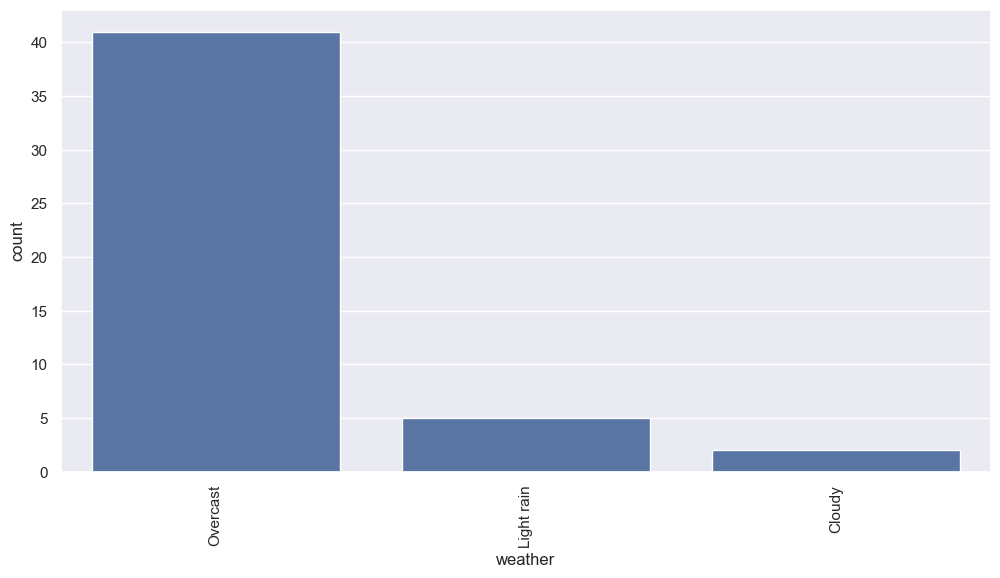

In [47]:
# Plot frequencies of weather types
weather_cats = weather['weather'].value_counts().reset_index()
weather_cats.columns = ['weather', 'count']

sns.set(rc={'figure.figsize': (12, 6)})
plt.xticks(rotation=90)
sns.barplot(x=weather_cats['weather'], y=weather_cats['count'])
   

In [50]:
# write a dataframe to csv with "date" being the first column
from fileinput import filename
def write_df_to_csv(df, filename):
    df.to_csv(filename, index='date', header=True, mode='w')
    return

write_df_to_csv(weather, 'weather.csv')

In [51]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2022-02-24 00:00:00+00:00 to 2022-02-25 23:00:00+00:00
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cape                 48 non-null     int64  
 1   cloud_cover_high     48 non-null     int64  
 2   cloud_cover_low      48 non-null     int64  
 3   cloud_cover_middle   48 non-null     int64  
 4   cloud_cover_total    48 non-null     int64  
 5   dew_point            48 non-null     float64
 6   evaporation          48 non-null     float64
 7   feels_like           48 non-null     float64
 8   humidity             48 non-null     float64
 9   icon                 48 non-null     int64  
 10  irradiance           48 non-null     float64
 11  ozone                48 non-null     int64  
 12  precipitation_total  48 non-null     float64
 13  precipitation_type   48 non-null     object 
 14  pressure             48 non-null     int64

In [78]:
# Load the dataset
file_path = 'weather.csv'
weather_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
weather_data.head()

,date,cape,cloud_cover_high,cloud_cover_low,cloud_cover_middle,cloud_cover_total,dew_point,evaporation,feels_like,humidity,...,summary,surface_temperature,temperature,weather,weather_id,wind_angle,wind_dir,wind_gusts,wind_speed,wind_chill
0,2022-02-24 00:00:00+00:00,0,96,63,99,100,0.1,0.0,-1.3,89.0,...,Overcast,1.2,1.5,Overcast,overcast,25,NNE,3.9,1.9,-0.6
1,2022-02-24 01:00:00+00:00,0,93,58,96,99,0.3,0.0,-1.0,90.0,...,Overcast,0.9,1.7,Overcast,overcast,36,NE,3.9,1.8,-0.2
2,2022-02-24 02:00:00+00:00,0,97,10,97,100,-0.1,0.0,-1.8,91.0,...,Light rain,1.4,1.1,Light rain,light_rain,46,NE,4.4,1.8,-1.0
3,2022-02-24 03:00:00+00:00,0,99,7,100,100,0.2,0.0,-1.4,91.0,...,Light rain,1.4,1.5,Light rain,light_rain,52,NE,4.5,2.0,-0.8
4,2022-02-24 04:00:00+00:00,0,99,0,100,100,0.3,0.0,-1.6,93.0,...,Light rain,1.6,1.3,Light rain,light_rain,48,NE,4.5,2.0,-1.0


In [80]:
# Convert the date column to datetime format
weather_data['date'] = pd.to_datetime(weather_data['date'])

# Extract the date without time
weather_data['day'] = weather_data['date'].dt.date

# Group by the day and aggregate the data
daily_weather = weather_data.groupby('day').agg({
    'cape': 'mean',
    'cloud_cover_high': 'mean',
    'cloud_cover_low': 'mean',
    'cloud_cover_middle': 'mean',
    'cloud_cover_total': 'mean',
    'dew_point': 'mean',
    'evaporation': 'mean',
    'feels_like': 'mean',
    'humidity': 'mean',
    'surface_temperature': 'mean',
    'temperature': 'mean',
    'wind_angle': 'mean',
    'wind_gusts': 'mean',
    'wind_speed': 'mean',
    'wind_chill': 'mean',
    'precipitation_total': 'mean',
    'weather': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],  # most frequent weather
    'summary': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],   # most frequent summary
    'weather_id': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],  # most frequent weather_id
    'precipitation_type': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0]  # most frequent weather_id
}).reset_index()

# Display the new daily weather dataset
daily_weather.head()


,day,cape,cloud_cover_high,cloud_cover_low,cloud_cover_middle,cloud_cover_total,dew_point,evaporation,feels_like,humidity,...,temperature,wind_angle,wind_gusts,wind_speed,wind_chill,precipitation_total,weather,summary,weather_id,precipitation_type
0,2022-02-24,2.375000,82.041667,68.750000,94.208333,99.416667,0.970833,0.013750,-0.883333,88.708333,...,2.616667,49.875,6.8875,3.170833,-0.4,0.05,Overcast,Overcast,overcast,none
1,2022-02-25,0.958333,70.750000,60.666667,83.833333,98.583333,1.904167,0.024583,-0.666667,91.333333,...,3.141667,65.875,7.9875,3.958333,-0.4,0.00,Overcast,Overcast,overcast,none


In [71]:
# We only need some of the weather variables
daily_weather = daily_weather[['cloud_cover_total', 'weather', 'summary' ,'weather_id', 'precipitation_type', 'precipitation_total', 'temperature', 'wind_speed']]

In [72]:
daily_weather

,cloud_cover_total,weather,summary,weather_id,precipitation_type,precipitation_total,temperature,wind_speed
0,99.416667,Overcast,Overcast,overcast,none,0.05,2.616667,3.170833
1,98.583333,Overcast,Overcast,overcast,none,0.00,3.141667,3.958333
